In [1]:
import pickle
import json

In [2]:
with open("/home/sean/Documents/phd/aitp/data/hol4/torch_graph_dict.pk", "rb") as f:
    torch_graph_dict = pickle.load(f)


In [3]:
test_exp = list(torch_graph_dict.keys())[0]

In [4]:
test_graph = torch_graph_dict[test_exp]

In [5]:
with open("/home/sean/Documents/phd/aitp/data/hol4/hol4_token_dict.pk", "rb") as f:
    hol4_dict = pickle.load(f)

In [34]:
tok_inds = list(test_graph.x.coalesce().indices().to_dense()[1].numpy())

In [35]:
toks = [hol4_dict[k] for k in tok_inds]

In [36]:
toks

['C$arithmetic$ZERO',
 'C$probability$|central_moment',
 'VAR',
 'C$bool$|!',
 'C$min$|=',
 '|',
 'C$probability$|variance',
 'VAR',
 'C$arithmetic$|BIT2',
 'C$arithmetic$|NUMERAL',
 'C$bool$|!',
 '|']

In [37]:
test_graph.edge_index

tensor([[ 1,  1,  1,  3,  4,  4,  5,  5,  6,  6,  8,  9, 10, 11, 11],
        [ 7,  2,  9,  5,  6,  1,  7, 10,  7,  2,  0,  8, 11,  2,  4]])

In [25]:
test_graph.edge_attr

tensor([0., 1., 2., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.])

In [ ]:
from_idx = edge_index[0]
to_idx = edge_index[1]

# find source node
all_nodes = torch.arange(num_nodes)
source_node = [x for x in all_nodes if x not in to_idx]

In [6]:
with open("/home/sean/Documents/phd/aitp/data/hol4/graph_token_encoder.pk", "rb") as f:
    enc = pickle.load(f)

/home/sean/Documents/venvs/torch/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.1.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [22]:
test_graph.x.to_dense().numpy().dot(enc.active_features_).astype(int)#enc.dot(test_graph.x.to_dense().numpy())

AttributeError: 'OneHotEncoder' object has no attribute 'active_features_'

In [7]:
with open("/home/sean/Documents/phd/aitp/data/hol4/new_db.json") as f:
    full_db = json.load(f)

In [8]:

polished_goals = [full_db[k][2] for k in full_db.keys()]



In [59]:
polished_goals

In [9]:
from data.hol4 import ast_def

/home/sean/Documents/venvs/torch/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.1.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
ast_graph_dict = {}

for goal in polished_goals:
    ast_graph_dict[goal] = ast_def.goal_to_graph_labelled(goal)

In [12]:
ast_graph_dict[list(ast_graph_dict.keys())[0]]


In [13]:
a = ast_def.goal_to_graph_labelled(polished_goals[0])

In [15]:
polished_goals[0]

'@ C$bool$ ! | Vp @ C$bool$ ! | VX @ @ C$min$ = @ @ C$probability$ variance Vp VX @ @ @ C$probability$ central_moment Vp VX @ C$arithmetic$ NUMERAL @ C$arithmetic$ BIT2 C$arithmetic$ ZERO'

AttributeError: 'NoneType' object has no attribute 'write'

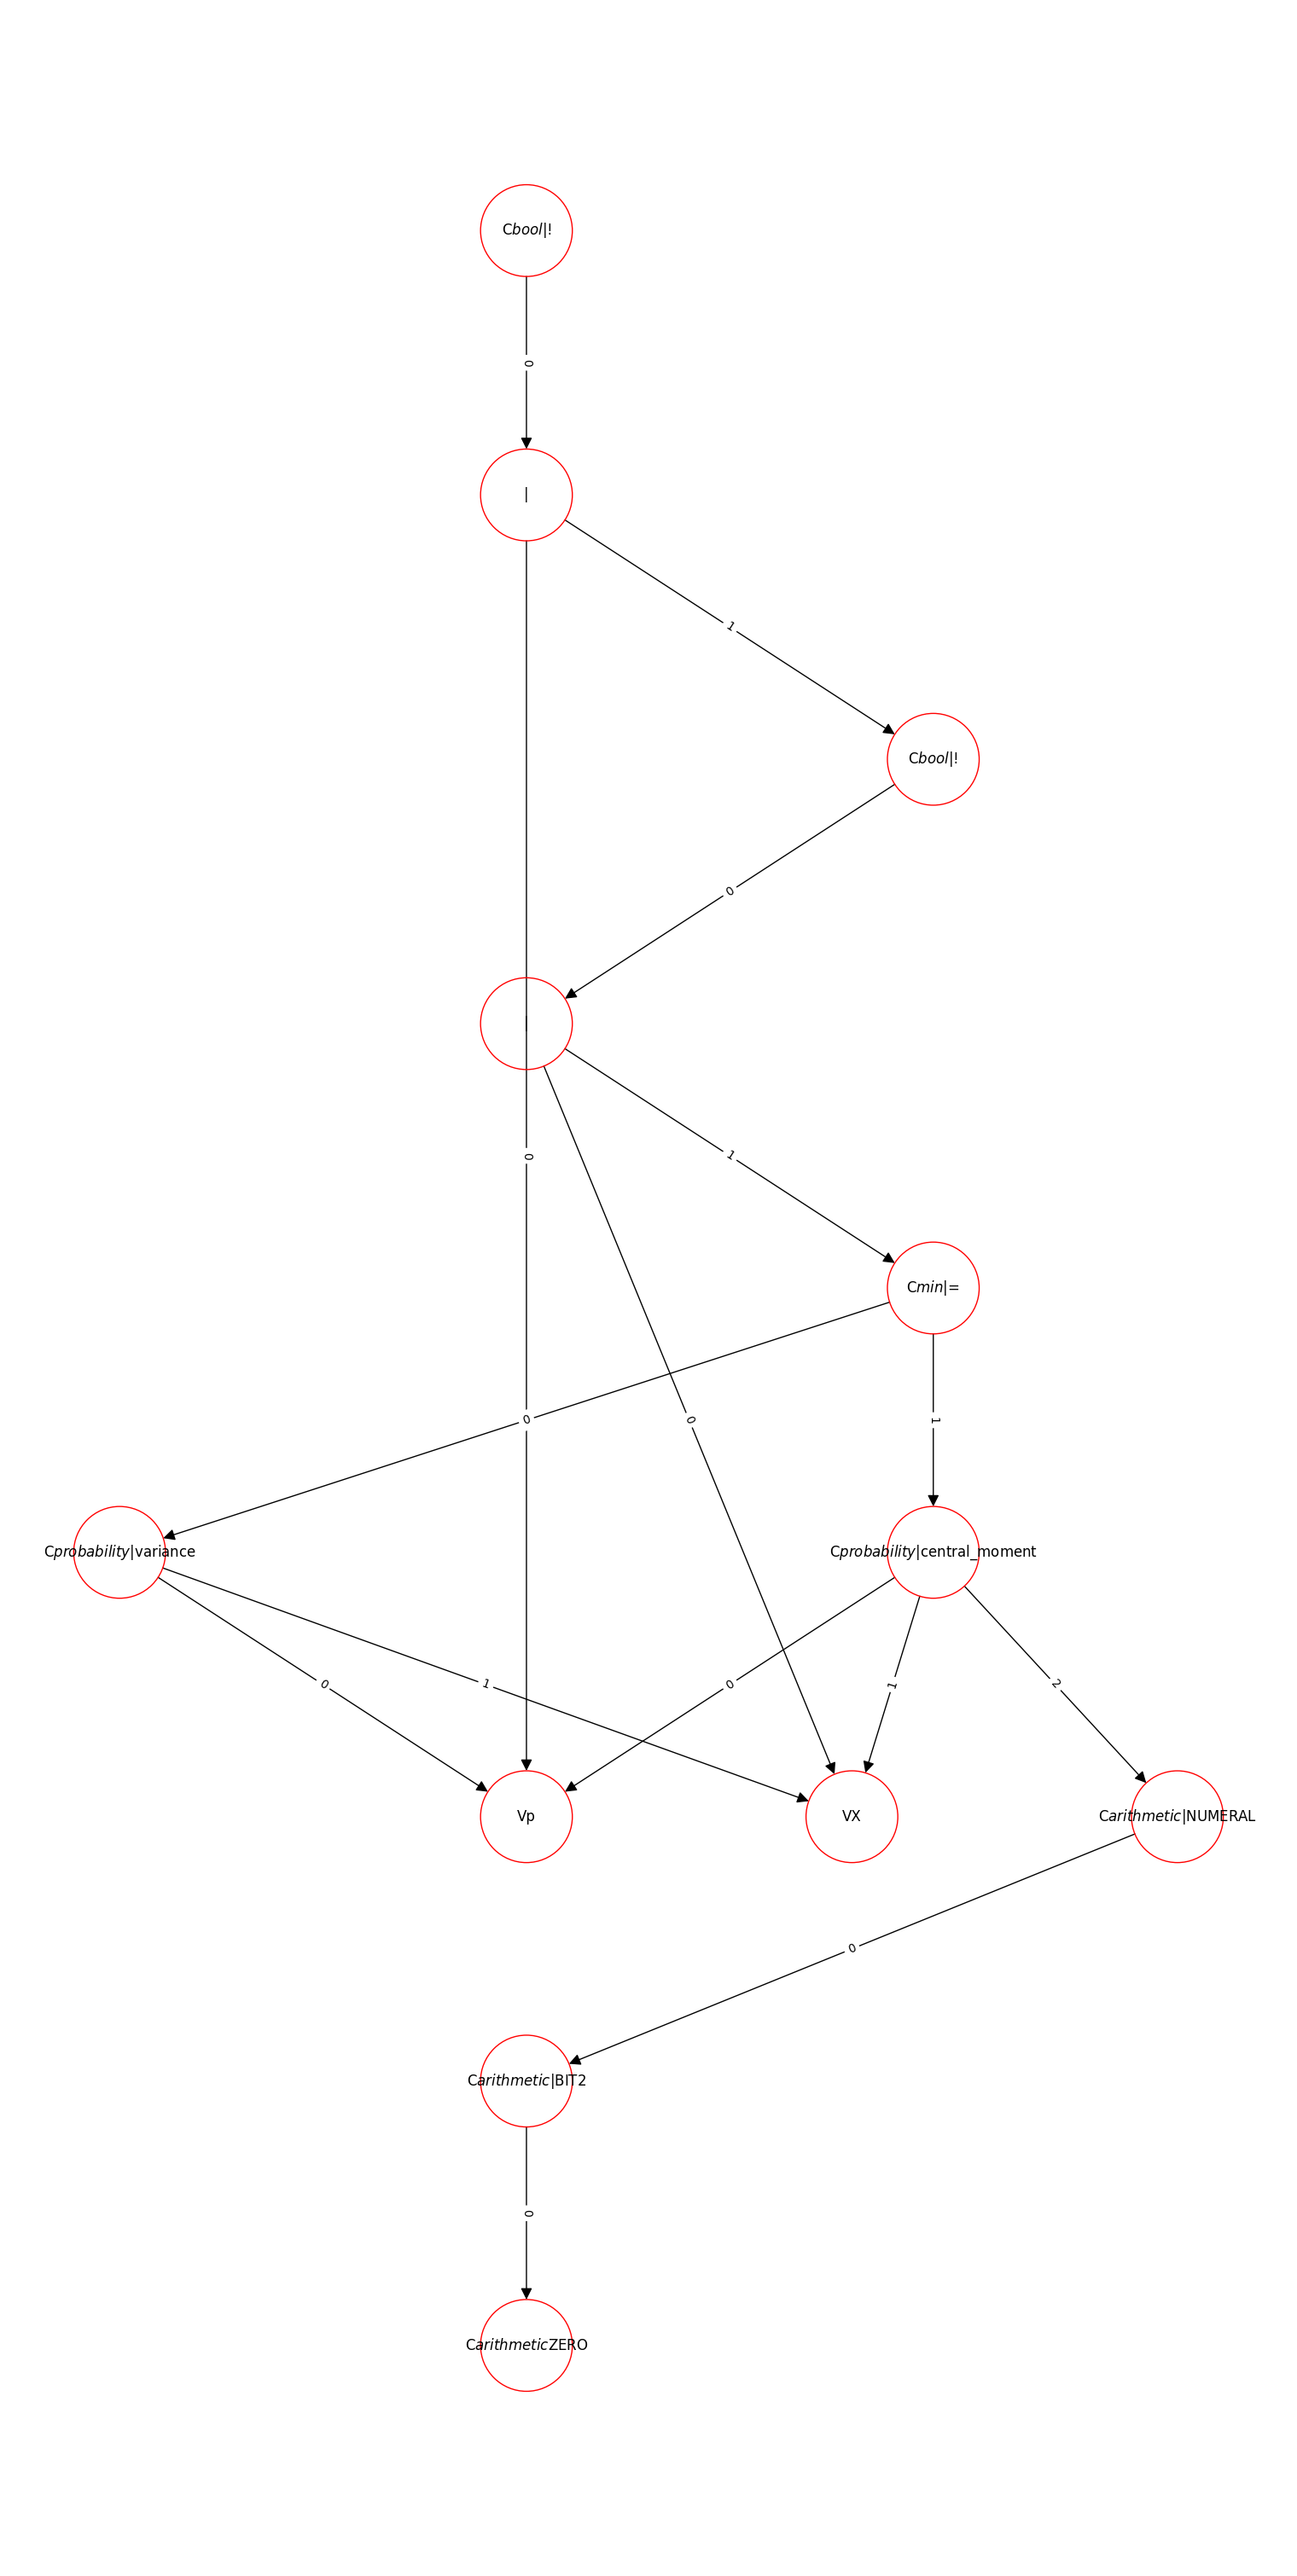

In [18]:
ast_def.print_graph(a, None)

In [ ]:
# function to go from graph back to AST

# make one_hot dictionary from encoder



In [19]:
import torch
import torch_geometric

In [44]:
# generate masked attention for graphs based on DAG

def get_directed_edge_index(num_nodes, edge_idx):
    from_idx = []
    to_idx = []

    for i in range(0,num_nodes-1):
        # to_idx = [i]
        try:
            ancestor_nodes, _, self_idx, _ = torch_geometric.utils.k_hop_subgraph(i, num_hops=num_nodes,edge_index=edge_idx)
            # print (f"ancestor nodes for {i}: {ancestor_nodes}")
        except:
            print (f"exception {i, num_nodes, edge_idx}")

        # ancestor_nodes = ancestor_nodes.item()
        found_nodes = list(ancestor_nodes.numpy())
        found_nodes.remove(i)


        if found_nodes is not None:
            for node in found_nodes:
                to_idx.append(i)
                from_idx.append(node)

        children_nodes, _, self_idx, _ = torch_geometric.utils.k_hop_subgraph(i, num_hops=num_nodes,edge_index=edge_idx, flow='target_to_source')

        found_nodes = list(children_nodes.numpy())
        found_nodes.remove(i)
        if found_nodes is not None:
            for node in found_nodes:
                to_idx.append(i)
                from_idx.append(node)

    return torch.tensor([from_idx, to_idx], dtype=torch.long)


In [45]:
test_graph
print (test_graph.num_nodes, test_graph.edge_index)
get_directed_edge_index(test_graph.num_nodes, test_graph.edge_index)

12 tensor([[ 1,  1,  1,  3,  4,  4,  5,  5,  6,  6,  8,  9, 10, 11, 11],
        [ 7,  2,  9,  5,  6,  1,  7, 10,  7,  2,  0,  8, 11,  2,  4]])


tensor([[ 1,  3,  4,  5,  8,  9, 10, 11,  3,  4,  5, 10, 11,  0,  2,  7,  8,  9,
          1,  3,  4,  5,  6, 10, 11,  0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11,
          3,  5, 10, 11,  0,  1,  2,  6,  7,  8,  9,  3,  0,  1,  2,  4,  6,  7,
          8,  9, 10, 11,  3,  4,  5, 10, 11,  2,  7,  1,  3,  4,  5,  6, 10, 11,
          1,  3,  4,  5,  9, 10, 11,  0,  1,  3,  4,  5, 10, 11,  0,  8,  3,  5,
          0,  1,  2,  4,  6,  7,  8,  9, 11],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
          8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10]])

In [47]:
test_graph.edge_index.shape[0]

2

In [50]:
from tqdm import tqdm

In [51]:
for k,g in tqdm(torch_graph_dict.items()):
    complete_edge_index = get_directed_edge_index(g.num_nodes, g.edge_index)
    g.complete_edge_index = complete_edge_index
    torch_graph_dict[k] = g

100%|██████████| 7872/7872 [03:49<00:00, 34.33it/s] 


In [68]:
test_new = torch_graph_dict[polished_goals[6]]

In [71]:
with open("torch_graph_dict_directed.pk", "wb") as f:
    pickle.dump(torch_graph_dict, f)

In [69]:
test_new.edge_index

tensor([[0, 1, 1, 2, 2, 4, 4, 5, 5, 6, 8, 9, 9],
        [2, 7, 6, 7, 3, 7, 3, 3, 9, 5, 1, 4, 0]])

In [70]:
test_new.complete_edge_index

tensor([[1, 5, 6, 8, 9, 2, 3, 7, 8, 0, 2, 3, 4, 5, 6, 7, 9, 0, 1, 5, 6, 8, 9, 3,
         7, 0, 1, 2, 4, 5, 6, 8, 9, 1, 5, 6, 8, 9, 3, 7, 1, 6, 8, 0, 2, 3, 4, 7,
         9, 1, 8, 0, 2, 3, 4, 5, 7, 9, 0, 1, 2, 4, 5, 6, 8, 9, 0, 1, 2, 3, 4, 5,
         6, 7, 9],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
         2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
         8, 8, 8]])

In [72]:
def get_depth_from_graph(num_nodes, edge_index):
    from_idx = edge_index[0]
    to_idx = edge_index[1]


    # find source node
    all_nodes = torch.arange(num_nodes)
    source_node = [x for x in all_nodes if x not in to_idx]

    assert len(source_node) == 1

    source_node = source_node[0]

    depths = torch.zeros(num_nodes, dtype=torch.long)

    prev_depth_nodes = [source_node]

    for i in range(1, num_nodes):
        all_i_depth_nodes , _, _, _ = torch_geometric.utils.k_hop_subgraph(source_node.item(), num_hops=i, edge_index=edge_index, flow='target_to_source')
        i_depth_nodes = [j for j in all_i_depth_nodes if j not in prev_depth_nodes]

        for node_idx in i_depth_nodes:
            depths[node_idx] = i

        prev_depth_nodes = all_i_depth_nodes


    return depths


In [74]:
test_new.edge_index

tensor([[0, 1, 1, 2, 2, 4, 4, 5, 5, 6, 8, 9, 9],
        [2, 7, 6, 7, 3, 7, 3, 3, 9, 5, 1, 4, 0]])

In [75]:
get_depth_from_graph(test_new.num_nodes, test_new.edge_index)

tensor([5, 1, 6, 4, 5, 3, 2, 2, 0, 4])

In [77]:
for k, v in torch_graph_dict.items():
    depth = get_depth_from_graph(v.num_nodes, v.edge_index)
    v.depth = depth
    torch_graph_dict[k] = v


In [78]:
with open("torch_graph_dict_directed_depth.pk", "wb") as f:
    pickle.dump(torch_graph_dict, f)

In [177]:
def positional_encoding(d_model, depth_vec):

    size, _ = depth_vec.shape

    div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))

    pe = torch.zeros(size, d_model)

    pe[:, 0::2] = torch.sin(depth_vec * div_term)
    pe[:, 1::2] = torch.cos(depth_vec * div_term)

    return pe


In [181]:
# pe = positional_encoding(128, torch.Tensor([1,2,3, 4, 5,6,7,8]).unsqueeze(1))



In [186]:
test_new.depth.tolist()

[5, 1, 6, 4, 5, 3, 2, 2, 0, 4]

In [182]:
# torch.cat([test_new.complete_edge_index, test_new.complete_edge_index], dim = 1)

In [187]:
5 // 2

2